In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df1=pd.read_csv('附件4.csv')
df2=df1.drop([5],axis=0)

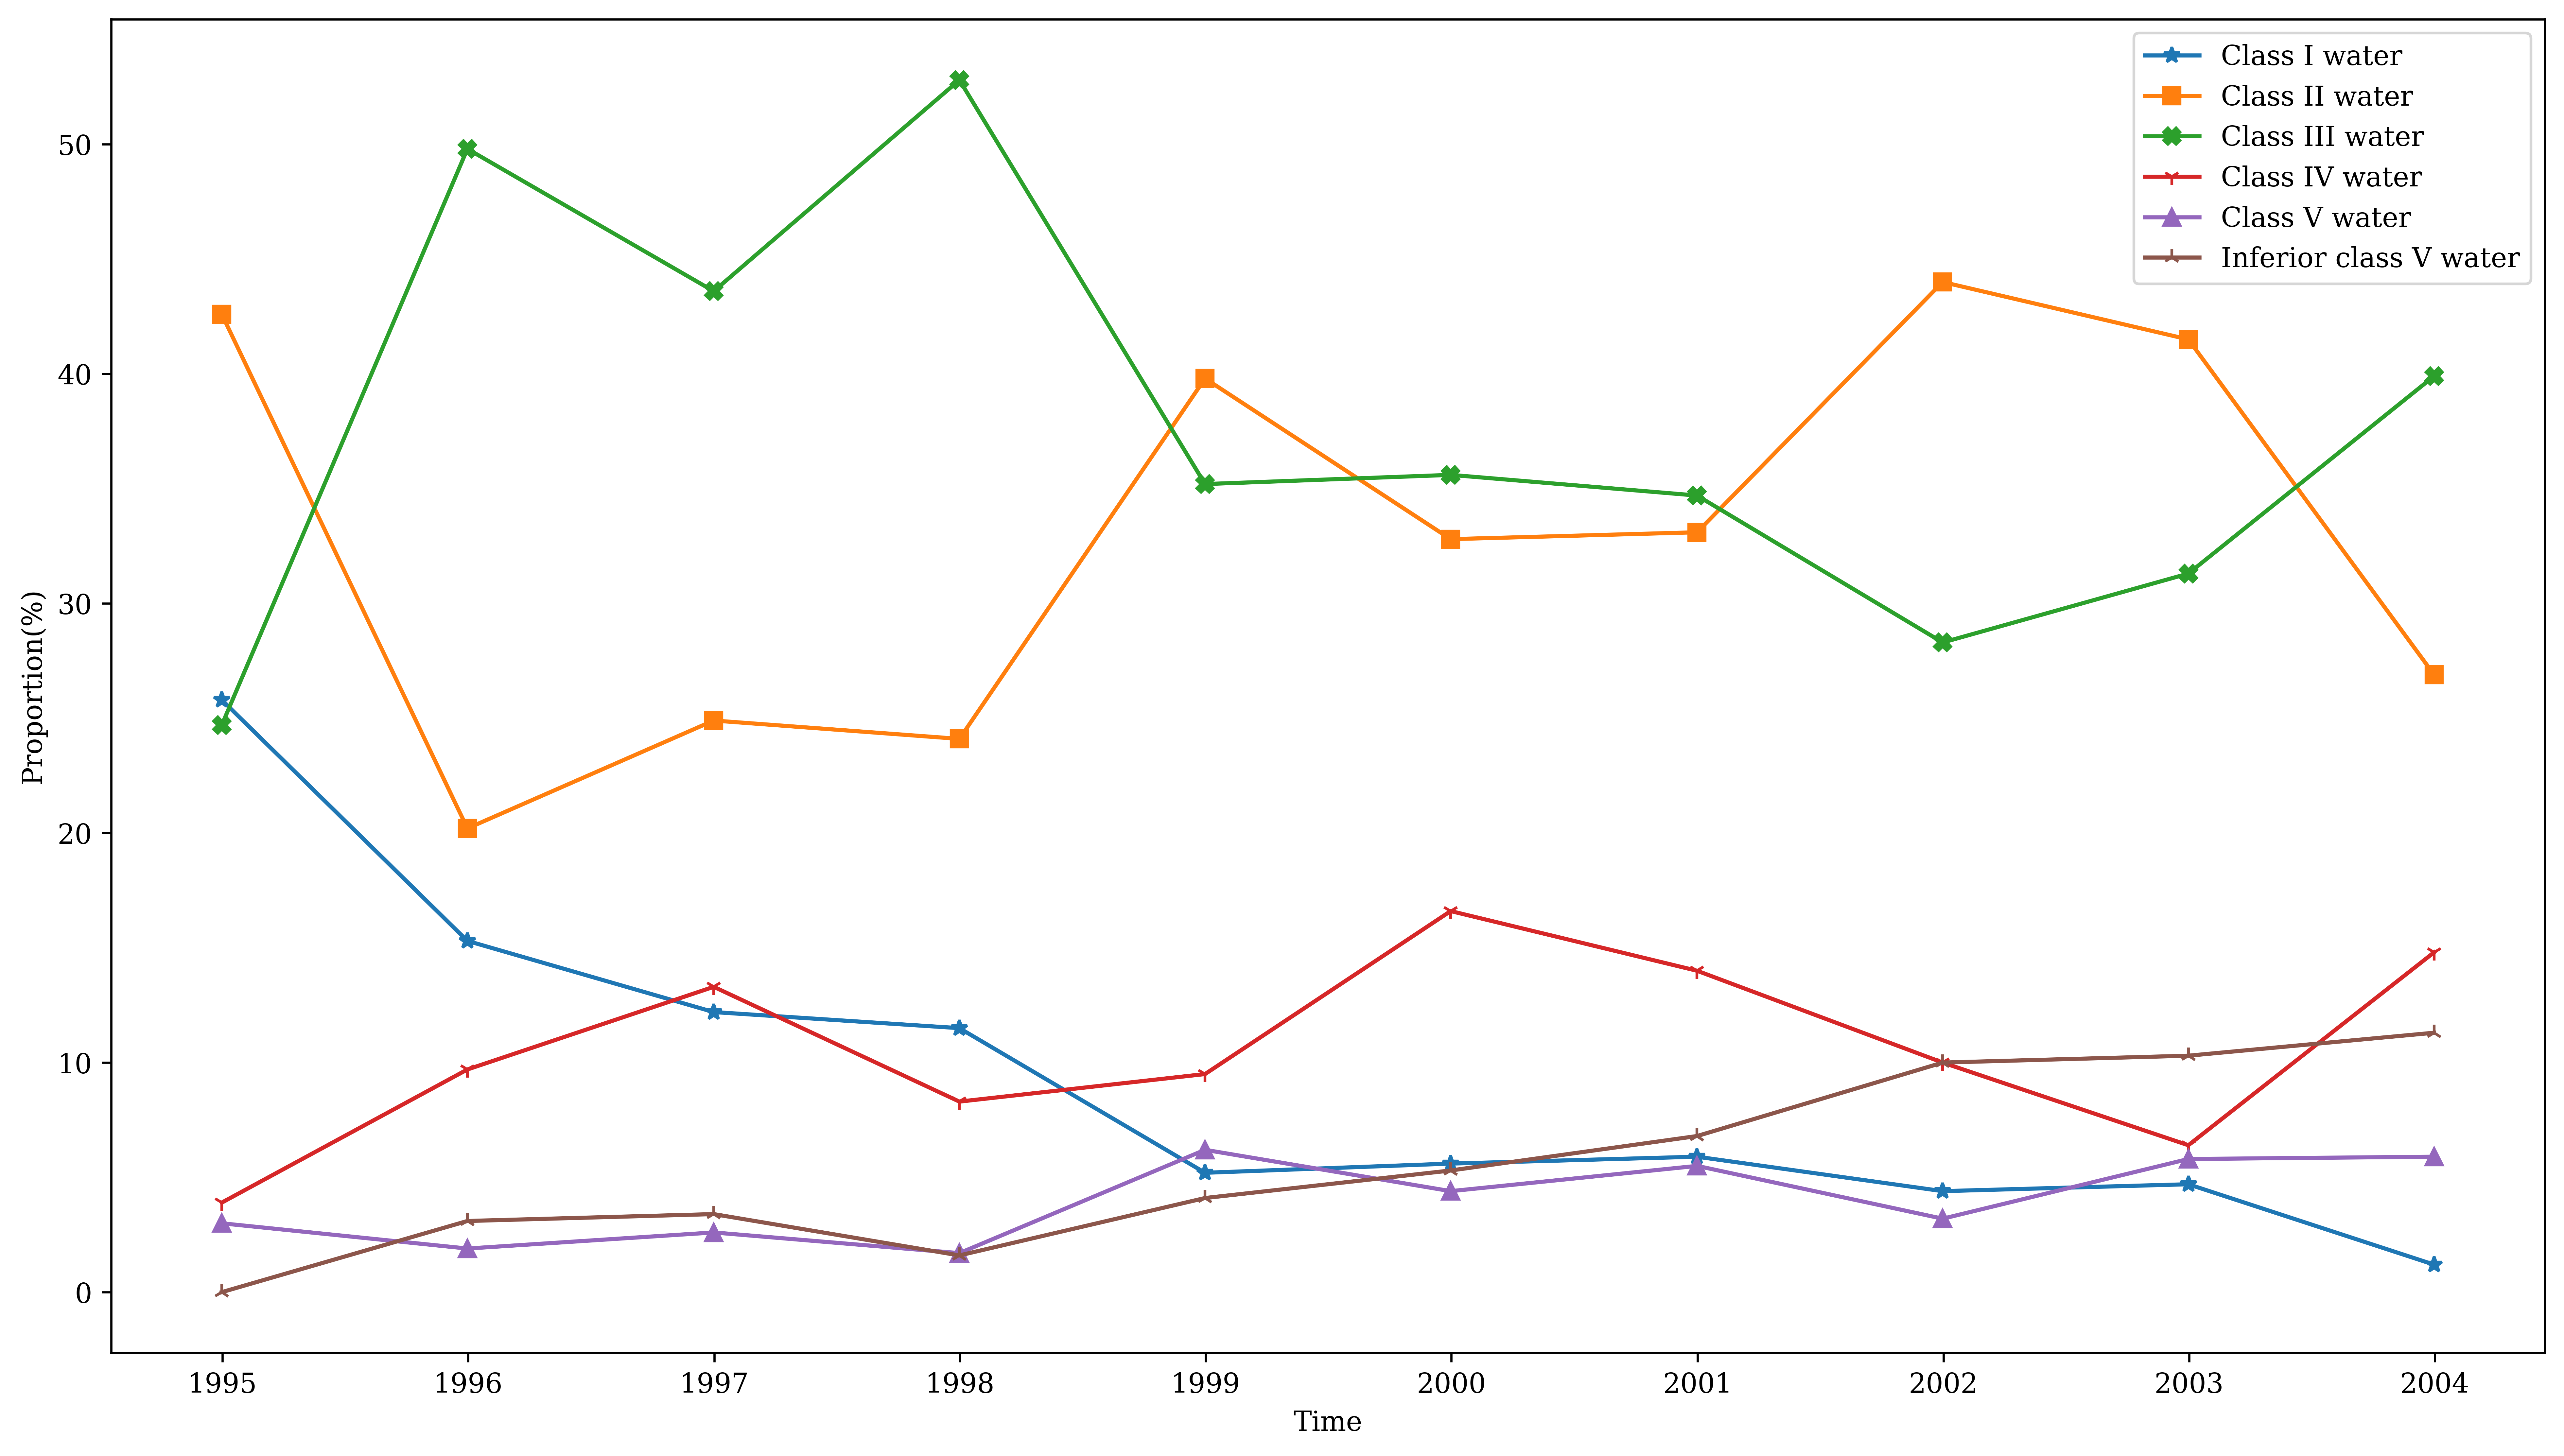

In [2]:
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(16,9),dpi=600)
plt.plot(pd.date_range('1994',freq='Y',periods=10),df2['1_%'].values,marker='*',label='Class I water')
plt.plot(pd.date_range('1994',freq='Y',periods=10),df2['2_%'].values,marker='s',label='Class II water')
plt.plot(pd.date_range('1994',freq='Y',periods=10),df2['3_%'].values,marker='X',label='Class III water')
plt.plot(pd.date_range('1994',freq='Y',periods=10),df2['4_%'].values,marker='1',label='Class IV water')
plt.plot(pd.date_range('1994',freq='Y',periods=10),df2['5_%'].values,marker='^',label='Class V water')
plt.plot(pd.date_range('1994',freq='Y',periods=10),df2['6_%'].values,marker='2',label='Inferior class V water')
plt.ylabel('Proportion(%)')
plt.xlabel('Time')
plt.xticks()
plt.legend()

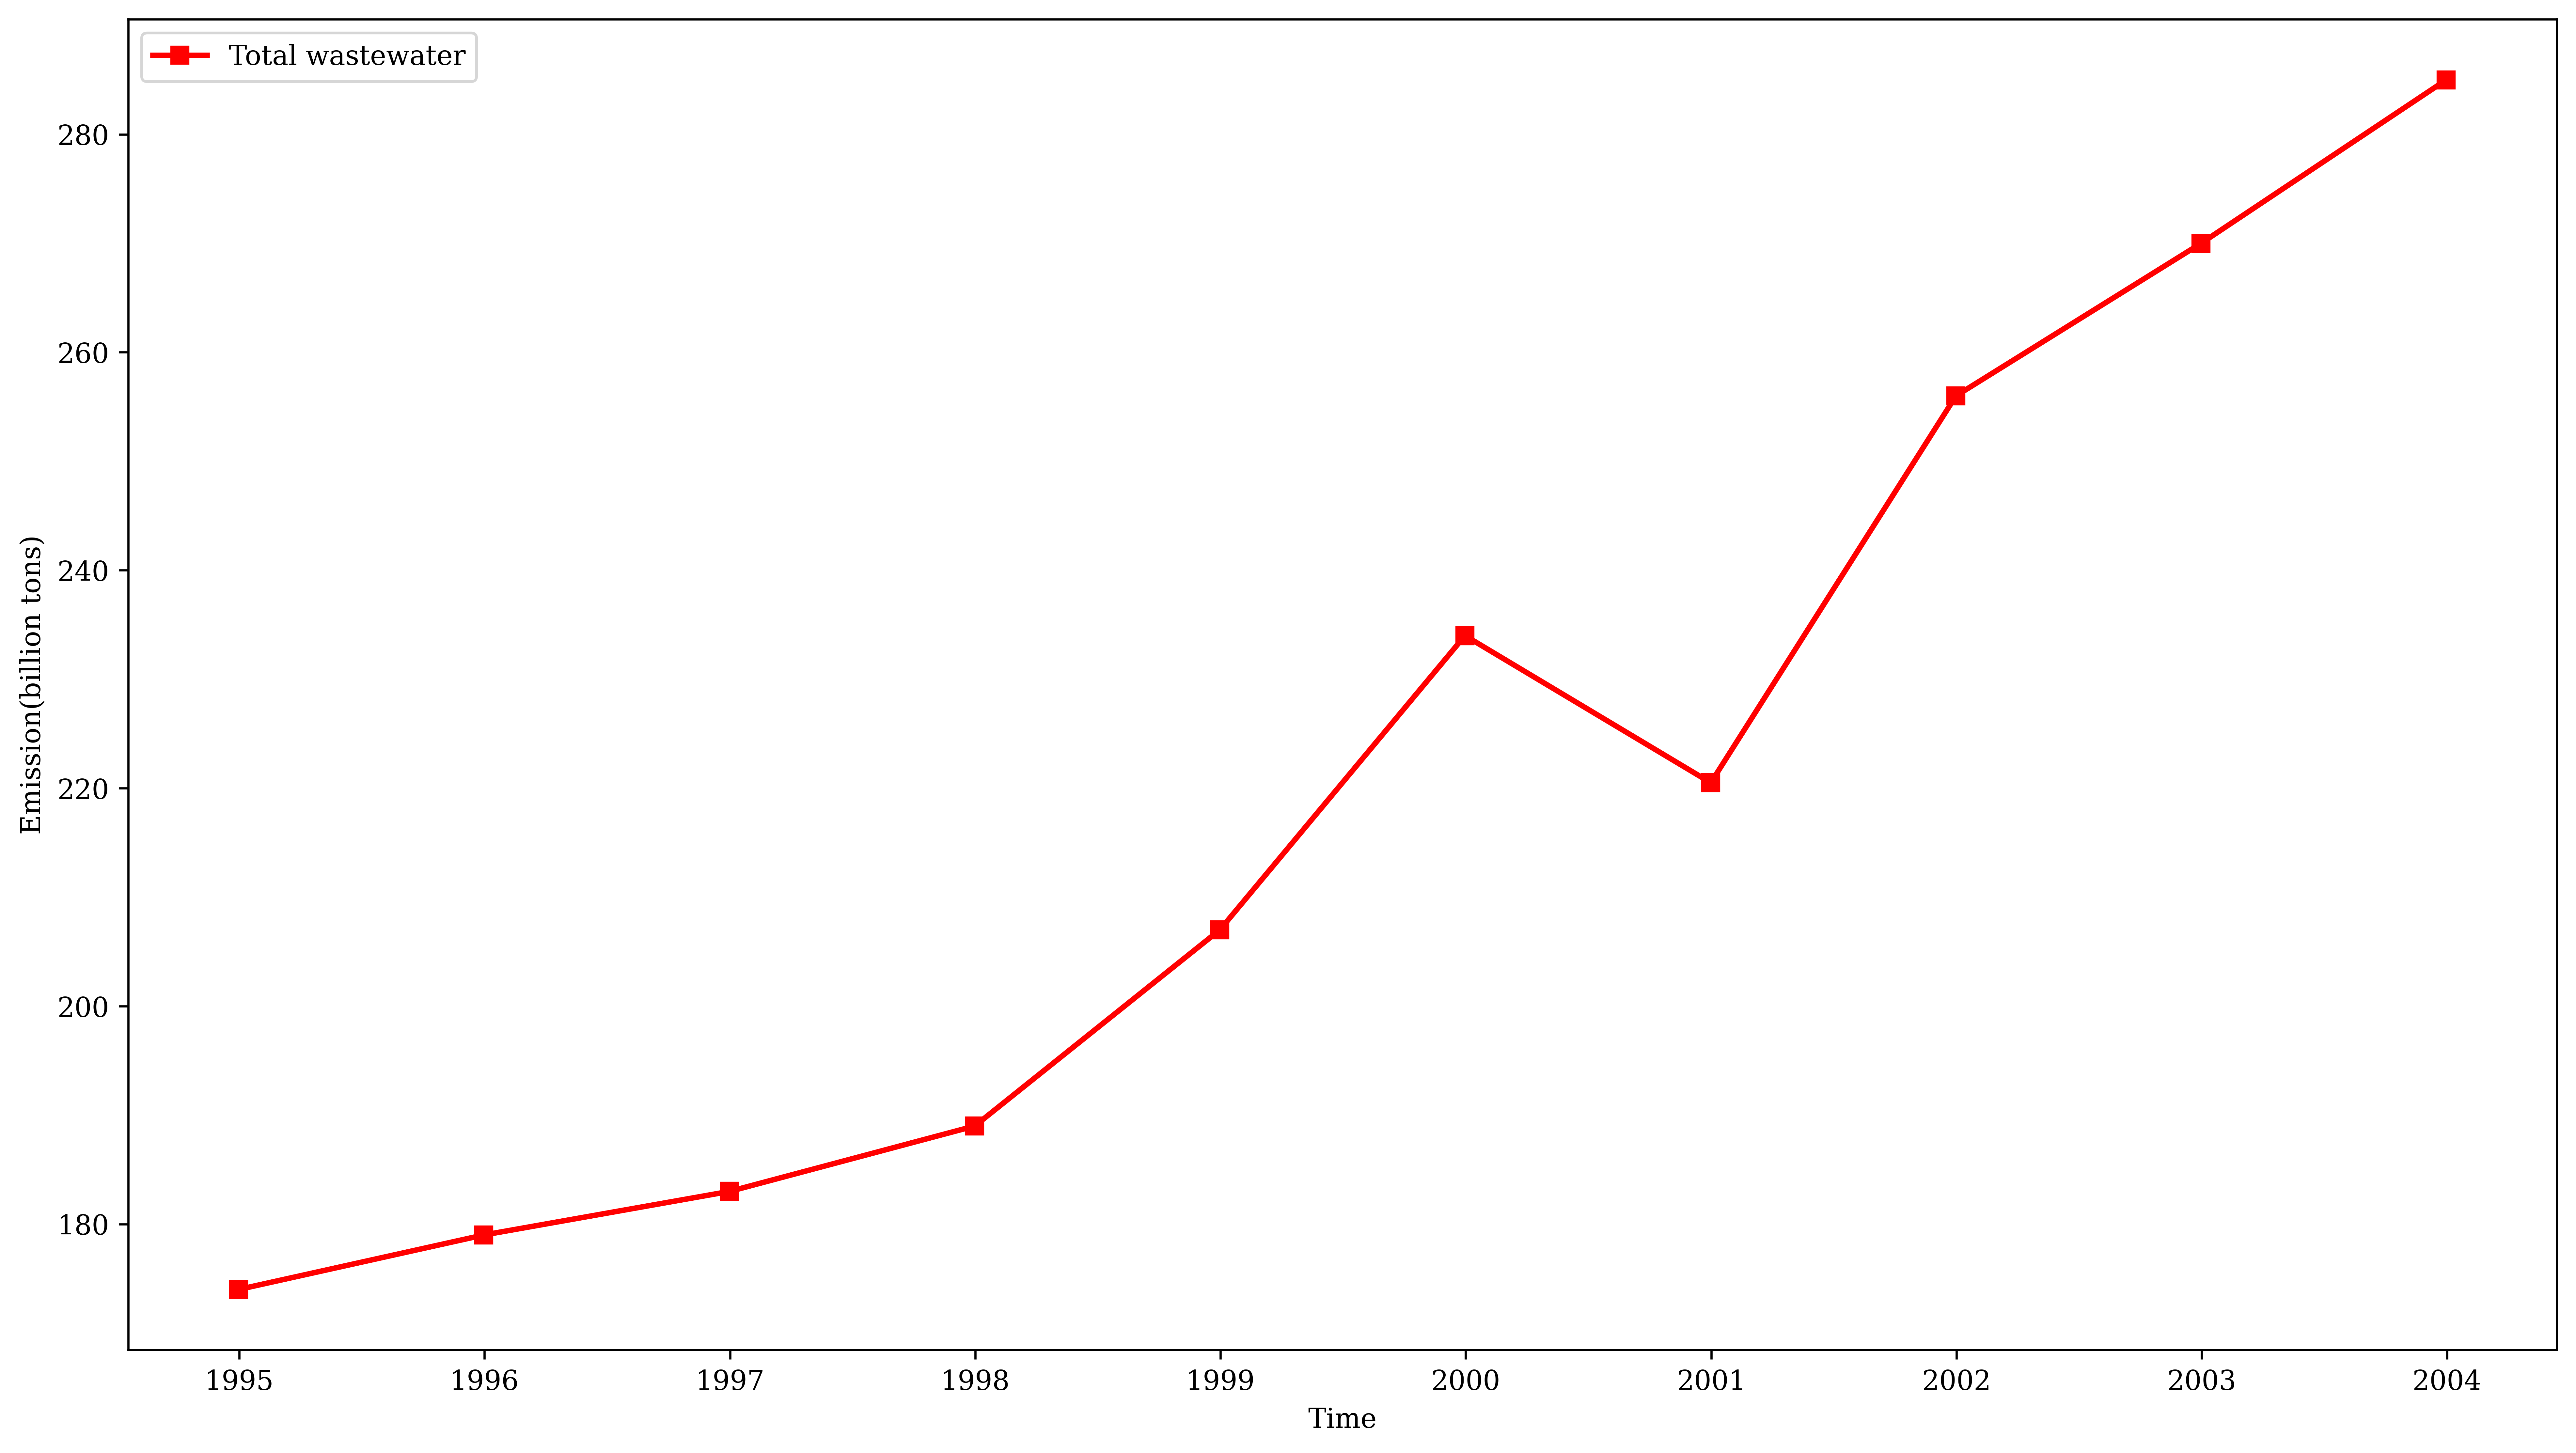

In [3]:
water_list=[174,179,183,189,207,234,220.5,256,270,285]
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(16,9),dpi=600)
plt.plot(pd.date_range('1994',freq='Y',periods=10),water_list,marker='s',label='Total wastewater',lw=2,c='r')
plt.ylabel('Emission(billion tons)')
plt.xlabel('Time')
plt.xticks()
plt.legend()

In [4]:
df3=pd.DataFrame({'value':water_list})
#时间序列算法预测未来十年的污水排放量
import pandas as pd
import datetime
import warnings
import statsmodels.api as sm
import matplotlib.pylab as plt
from matplotlib.pylab import style
from matplotlib.font_manager import FontProperties
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
#使用adf检验的方法确定股票价格是否走势平稳，不平稳时使用差分法进行处理
dftest=adfuller(water_list)
#下标为1时表示的是 p的值 adf 检验中我们认为一般p的值小于0.05时可以认为是走势平稳
print('数据未进行差分前的adf检验p值：',dftest[1])

数据未进行差分前的adf检验p值： 0.9961010741487764


In [5]:
#确定模型参数d
diff_1=df3.diff(1)
#df.dropna 表示过滤缺失值
diff=diff_1.dropna()
print("一阶差分处理之后的数据分布：")
print(diff)
dftest=adfuller(diff)
print('数据未进行差分前的adf检验p值：',dftest[1])

一阶差分处理之后的数据分布：
   value
1    5.0
2    4.0
3    6.0
4   18.0
5   27.0
6  -13.5
7   35.5
8   14.0
9   15.0
数据未进行差分前的adf检验p值： 0.0006470947581844893


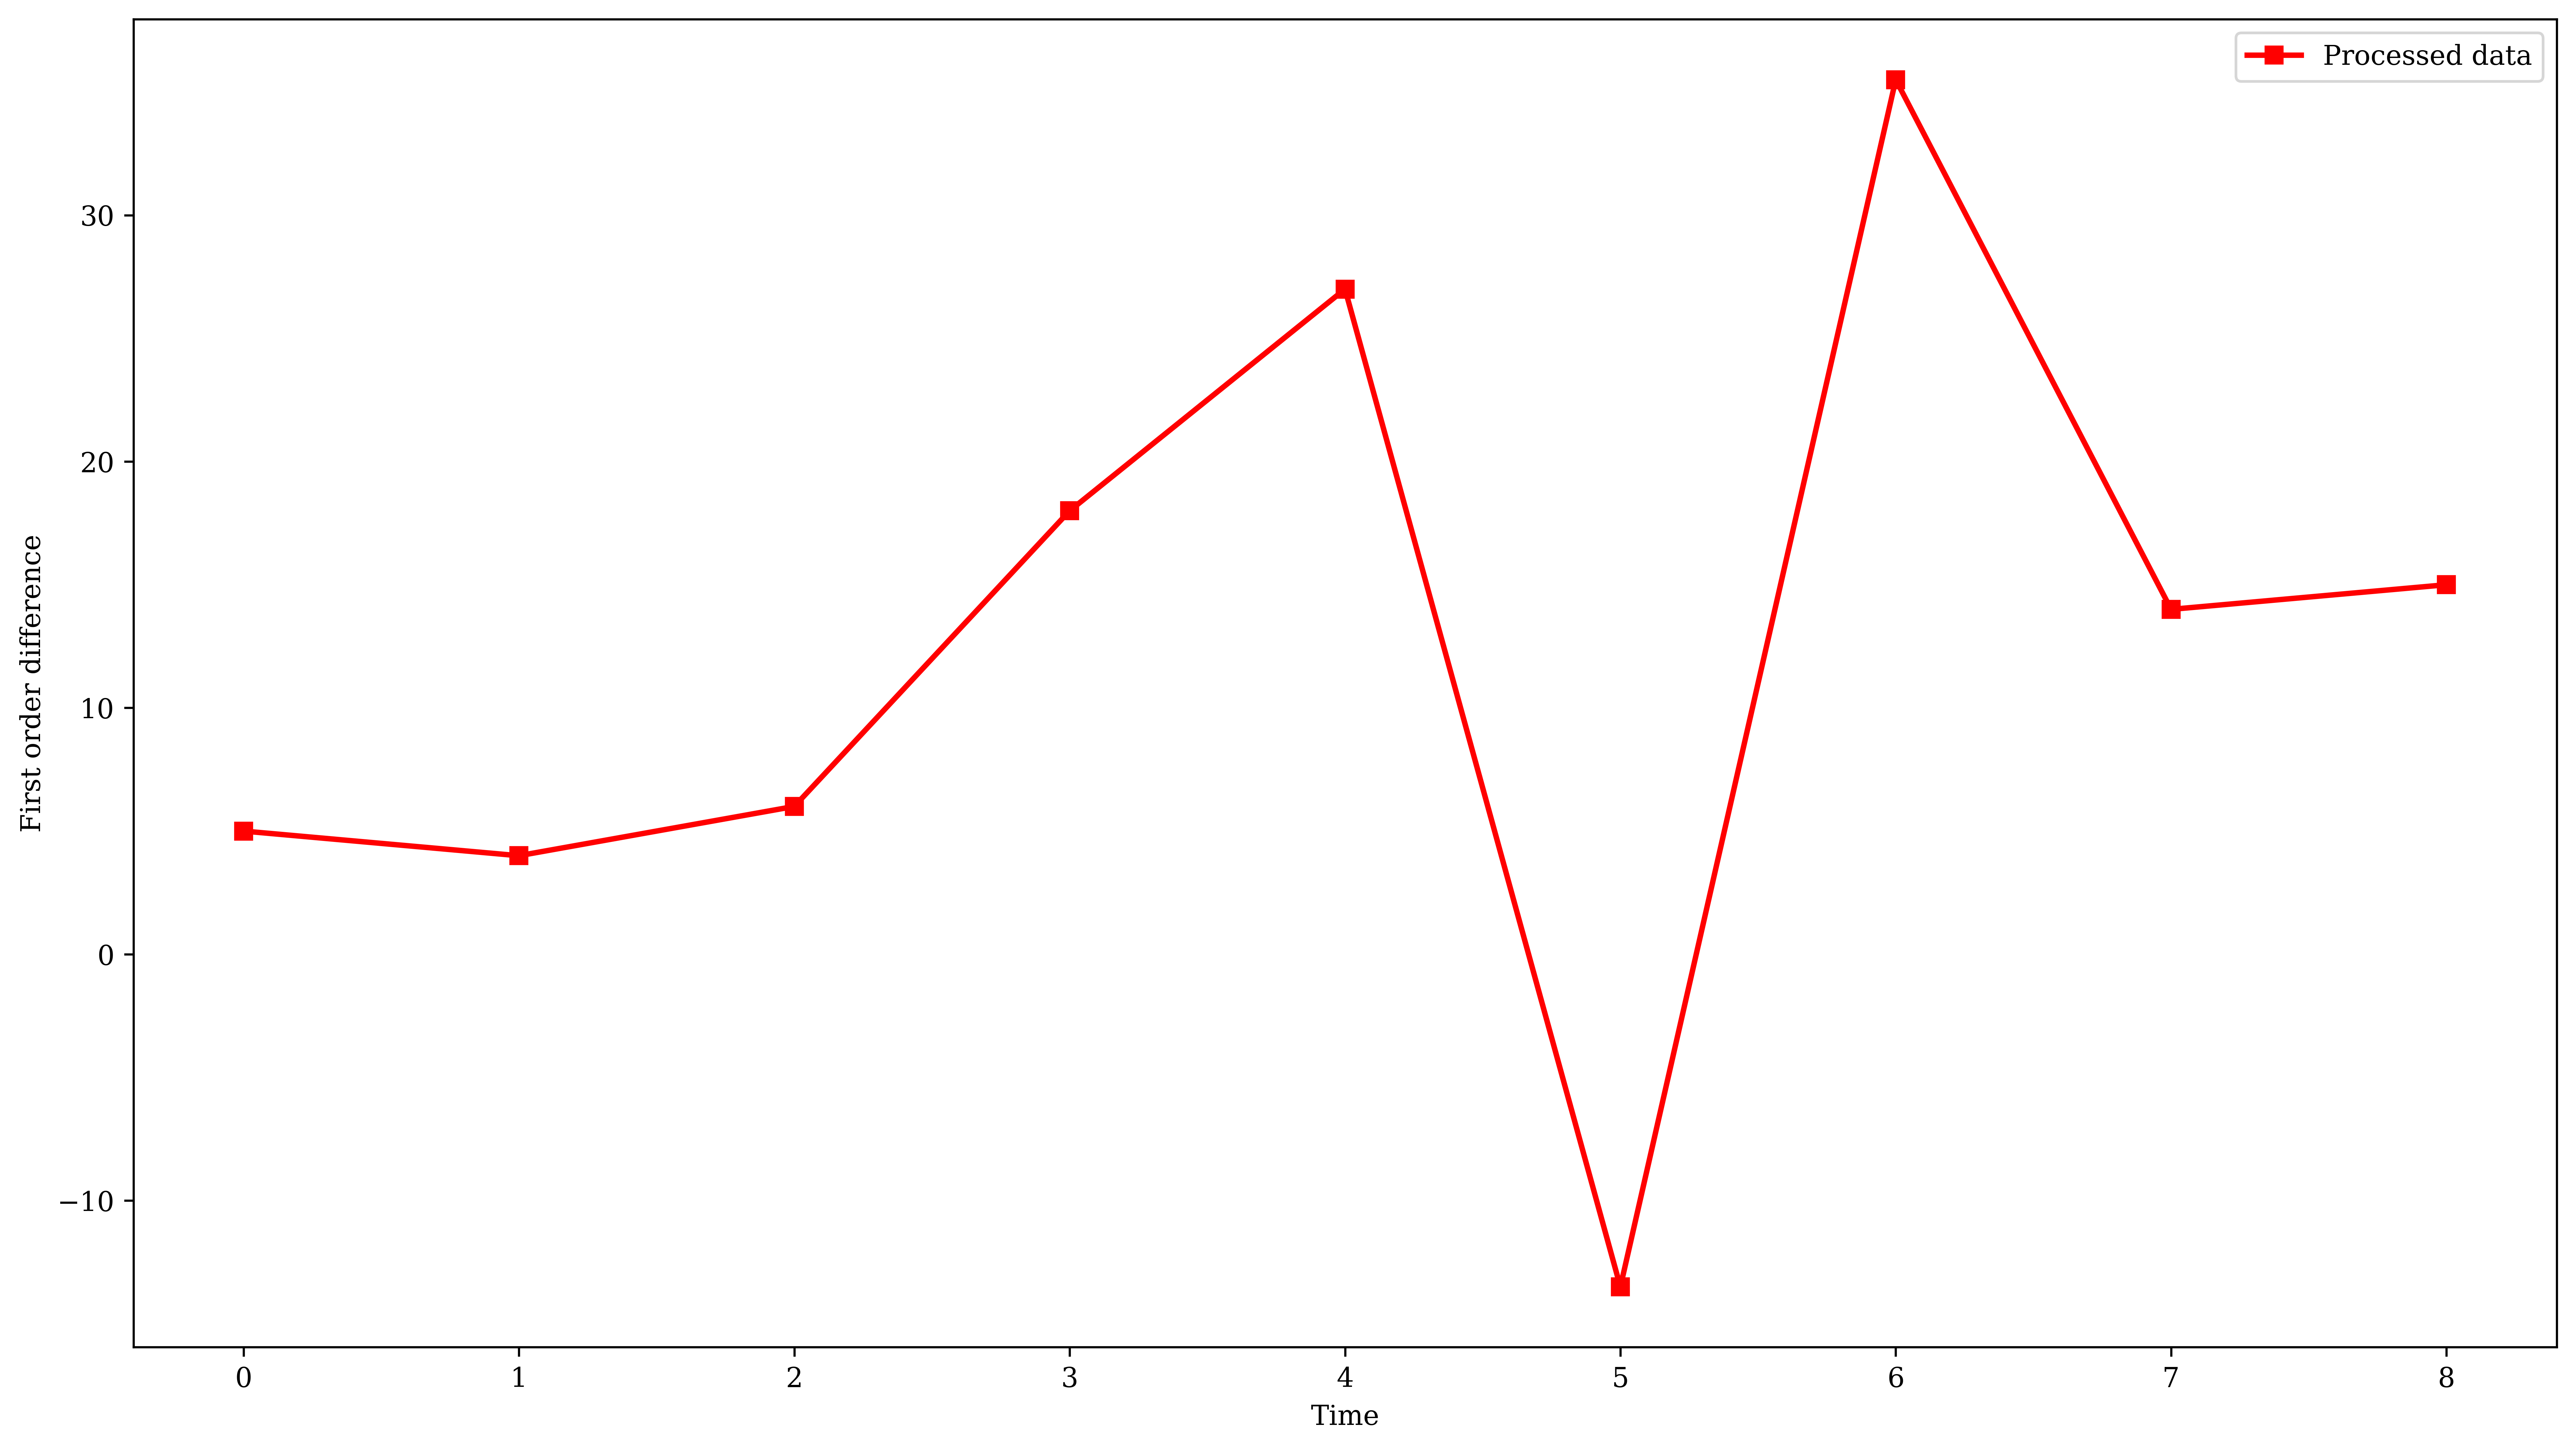

In [6]:
#绘制差分之后的图形
plt.figure(figsize=(16,9),dpi=600)
plt.plot(range(len(diff)),diff.values,marker='s',label='Processed data',lw=2,c='r')
plt.ylabel('First order difference')
plt.xlabel('Time')
plt.xticks()
plt.legend()

<Figure size 9600x5400 with 0 Axes>

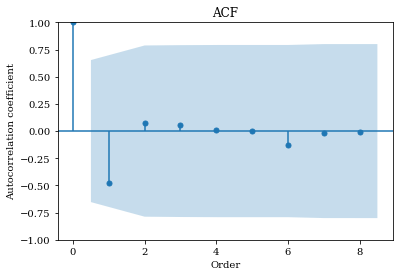

In [7]:
#绘制自相关系数的图形 找出模型参数中的p值
plt.figure(figsize=(16,9),dpi=600)
acf = plot_acf(diff, lags=8)
plt.title("ACF")
plt.xlabel("Order")
plt.ylabel("Autocorrelation coefficient")
plt.show()

D:\Anacoda\anaconda\envs\BigData\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 9600x5400 with 0 Axes>

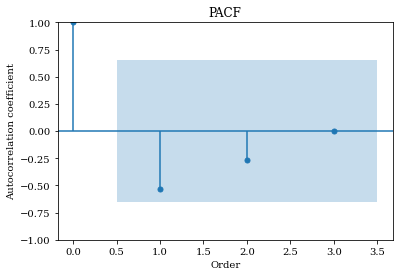

In [8]:
plt.figure(figsize=(16,9),dpi=600)
acf = plot_pacf(diff, lags=3)
plt.title("PACF")
plt.xlabel("Order")
plt.ylabel("Autocorrelation coefficient")
plt.show()

In [9]:
#训练模型(p=2,d=2,q=2)
model=ARIMA(diff,order=(1,1,1))
result_1=model.fit()
print(result_1.summary())
#预测范围从2014.6.9到2016.6.27 dynamic=True 表示对样本外的数据进行预测
#type=levels 表示在差分数据中进行预测，默认为原数据预测
pre_1=result_1.predict(10,19,dynamic=True,type='levels')
print(pre_1)

D:\Anacoda\anaconda\envs\BigData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anacoda\anaconda\envs\BigData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anacoda\anaconda\envs\BigData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anacoda\anaconda\envs\BigData\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                    9
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -33.018
Date:                Thu, 30 Jun 2022   AIC                             72.035
Time:                        08:53:33   BIC                             72.274
Sample:                             0   HQIC                            70.428
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4286      0.372     -1.152      0.250      -1.158       0.301
ma.L1         -0.7632      0.717     -1.065      0.287      -2.168       0.641
sigma2       183.5811    162.049      1.133      0.2

D:\Anacoda\anaconda\envs\BigData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\Anacoda\anaconda\envs\BigData\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [10]:
pre_2=result_1.predict(1,9,dynamic=False,type='levels')
pre_2=[174]+(pre_2.cumsum()+water_list[0]).to_list()
pre_2

D:\Anacoda\anaconda\envs\BigData\lib\site-packages\statsmodels\tsa\base\tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


[174,
 178.99822241592176,
 183.7049284818976,
 188.1271968070805,
 192.0297225267954,
 198.83723882421106,
 217.5588497137627,
 219.55115815659332,
 233.7241197376497,
 247.6692146742411]

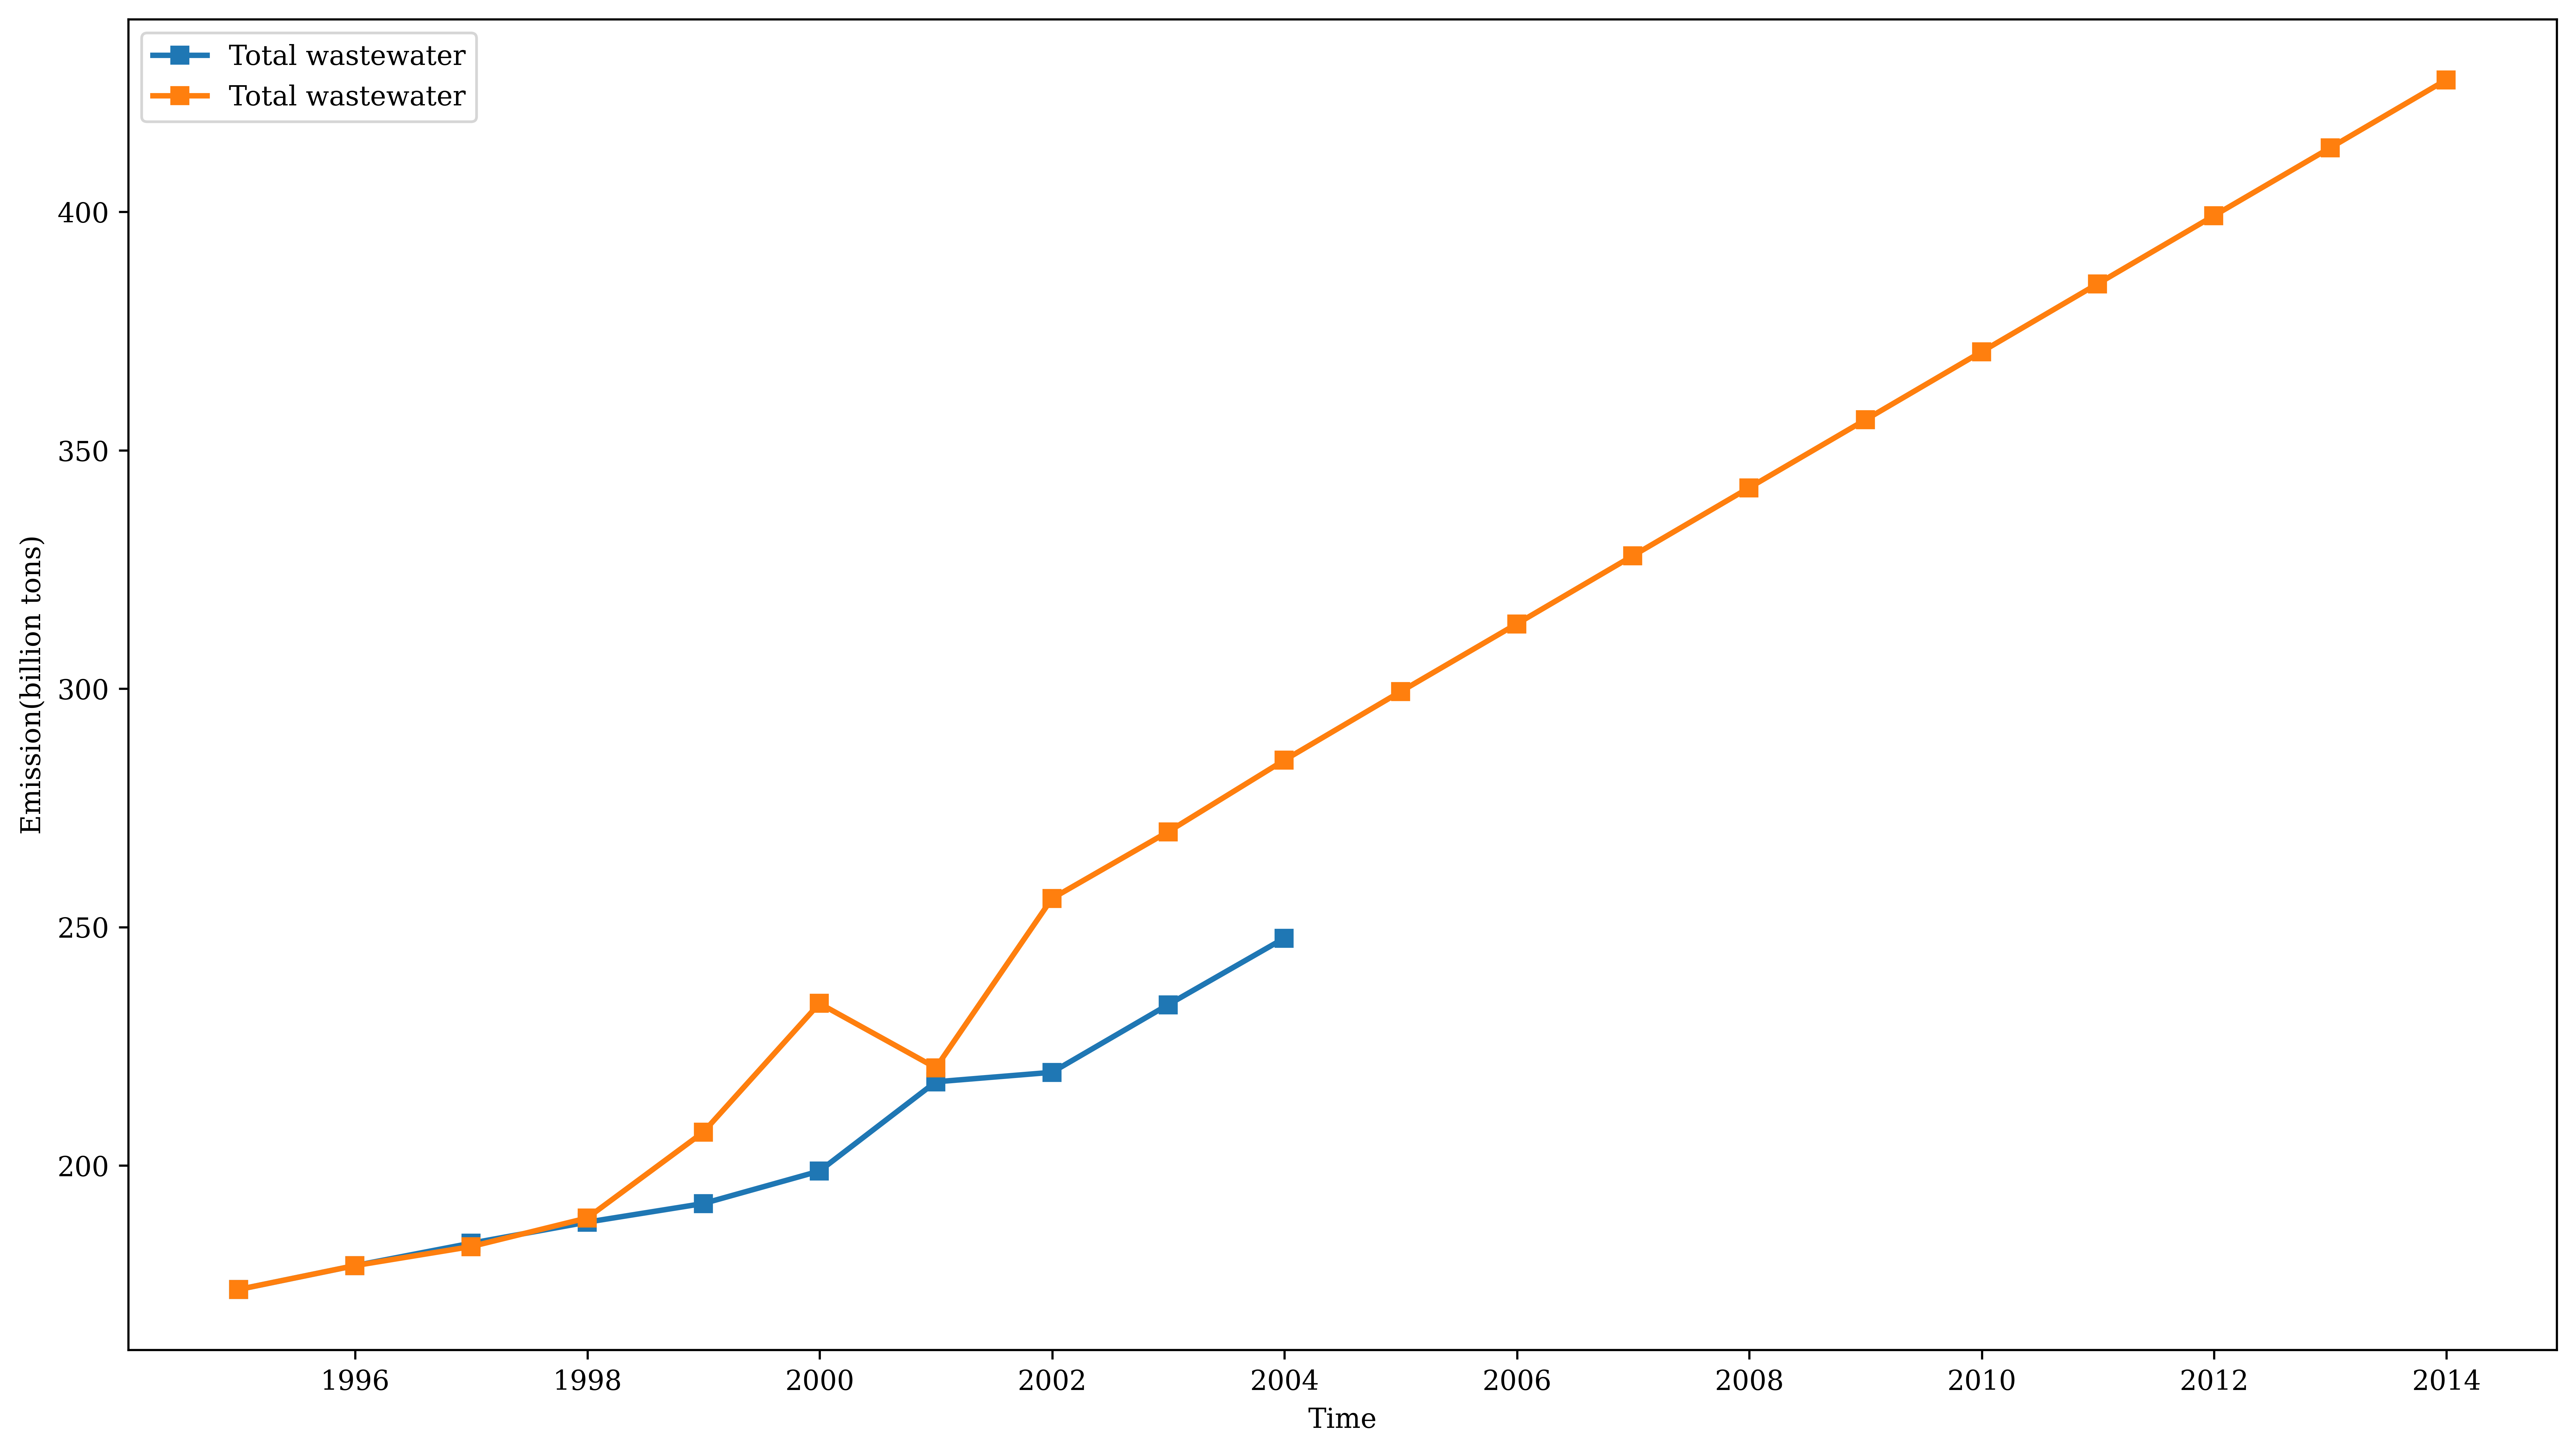

In [11]:
pre_water_list=water_list[-1]+pre_1.cumsum()
pre_water_list=water_list+pre_water_list.to_list()
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(16,9),dpi=600)
plt.plot(pd.date_range('1994',freq='Y',periods=10),pre_2,marker='s',label='Total wastewater',lw=2)
plt.plot(pd.date_range('1994',freq='Y',periods=20),pre_water_list,marker='s',label='Total wastewater',lw=2)
plt.ylabel('Emission(billion tons)')
plt.xlabel('Time')
plt.xticks()
plt.legend()

In [12]:
df4=pd.DataFrame({"ds":pd.date_range('1994',freq='Y',periods=10),'y':water_list})
df4

ds      y
0 1994-12-31  174.0
1 1995-12-31  179.0
2 1996-12-31  183.0
3 1997-12-31  189.0
4 1998-12-31  207.0
5 1999-12-31  234.0
6 2000-12-31  220.5
7 2001-12-31  256.0
8 2002-12-31  270.0
9 2003-12-31  285.0

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


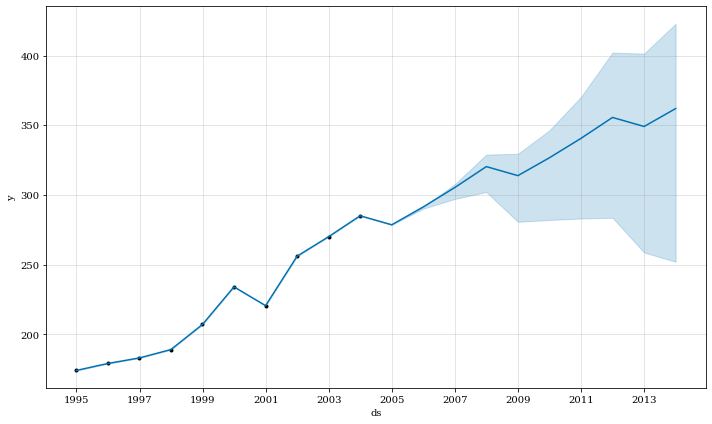

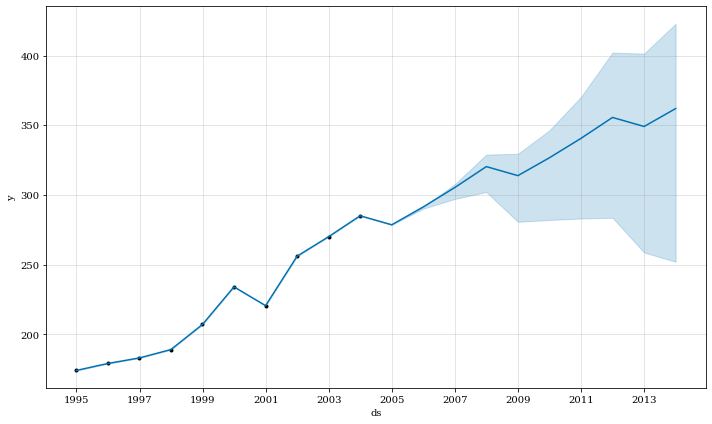

In [13]:
from fbprophet import Prophet
m=Prophet(changepoint_prior_scale=0.9,interval_width=0.2,changepoint_range=0.9,n_changepoints=8,growth='linear')
m.fit(df4)
future=m.make_future_dataframe(periods=10,freq='Y')
forecast2=m.predict(future)
m.plot(forecast2)

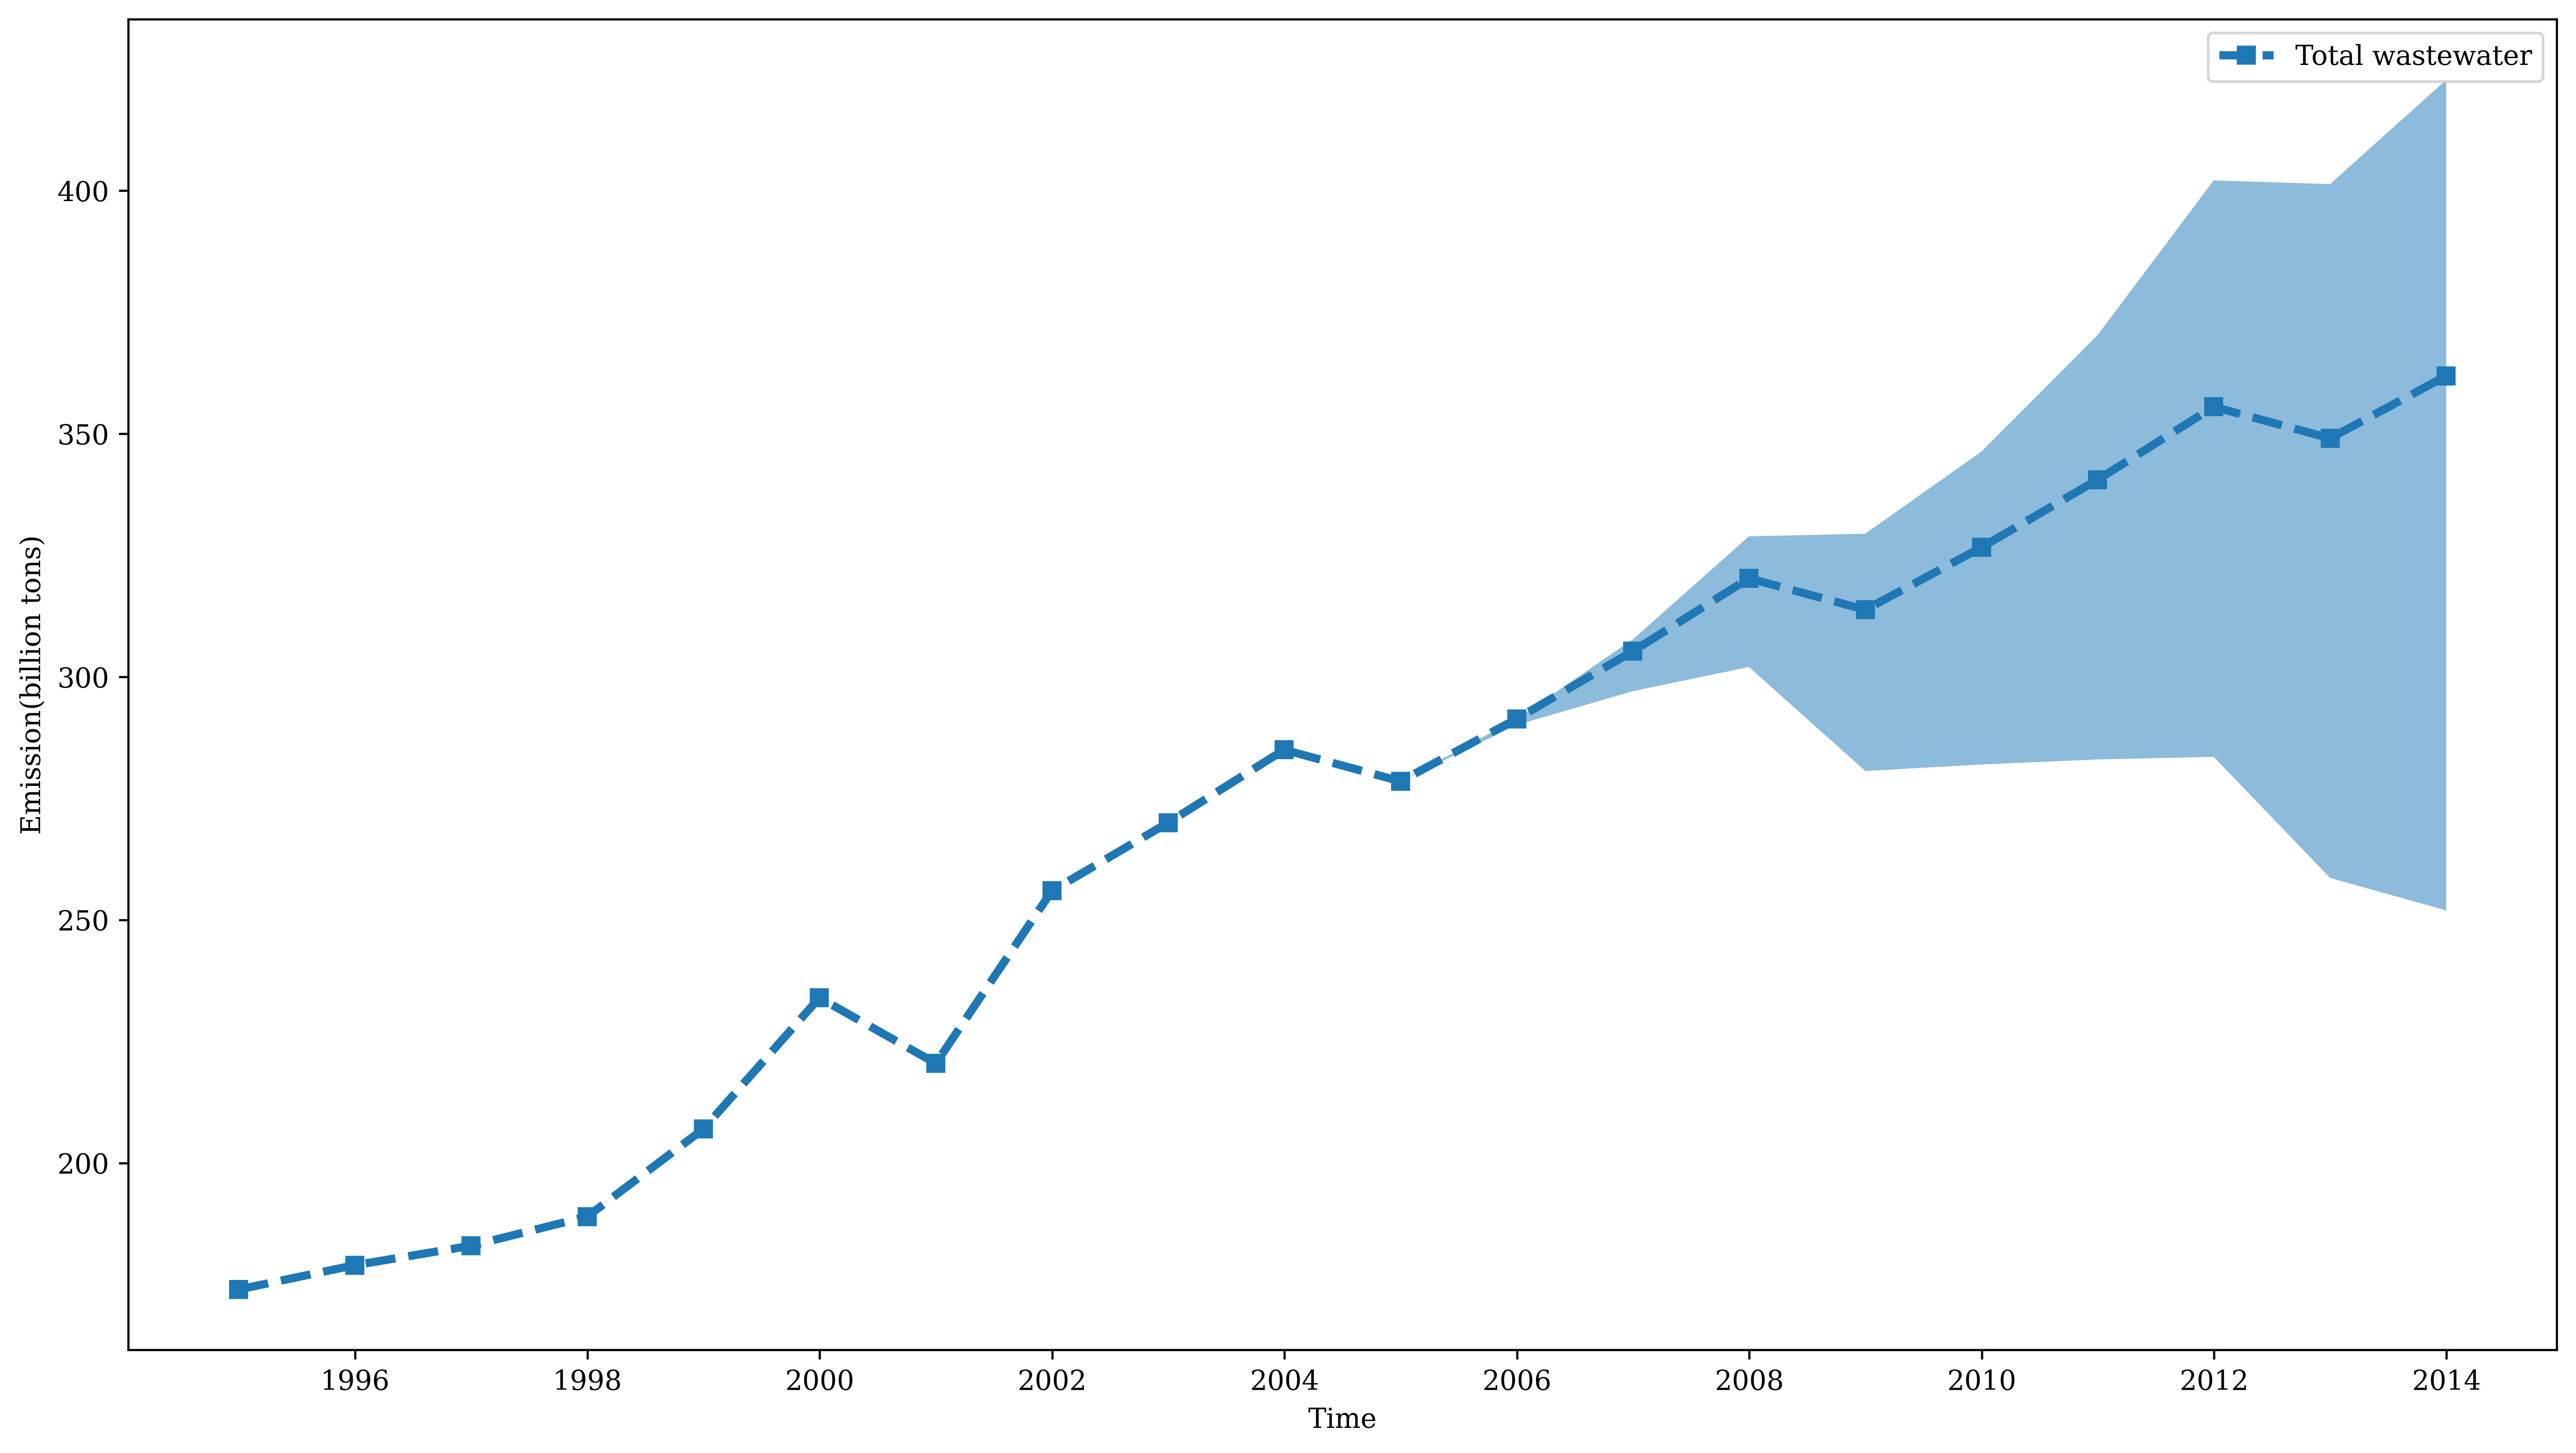

In [14]:
fig, ax = plt.subplots(dpi=600,figsize=(16,9))
ax.fill_between(pd.date_range('1994',freq='Y',periods=20),forecast2['yhat_upper'], forecast2['yhat_lower'], alpha=.5,linewidth=0)
plt.plot(pd.date_range('1994',freq='Y',periods=20),forecast2['yhat'],marker='s',label='Total wastewater',lw=3,ls='--')
plt.ylabel('Emission(billion tons)')
plt.xlabel('Time')
plt.xticks()
plt.legend()
plt.savefig(r'C:\Users\Bingbing\Desktop\废水预测.png')

In [15]:
forecast2.to_csv('feishuiyuce.csv')

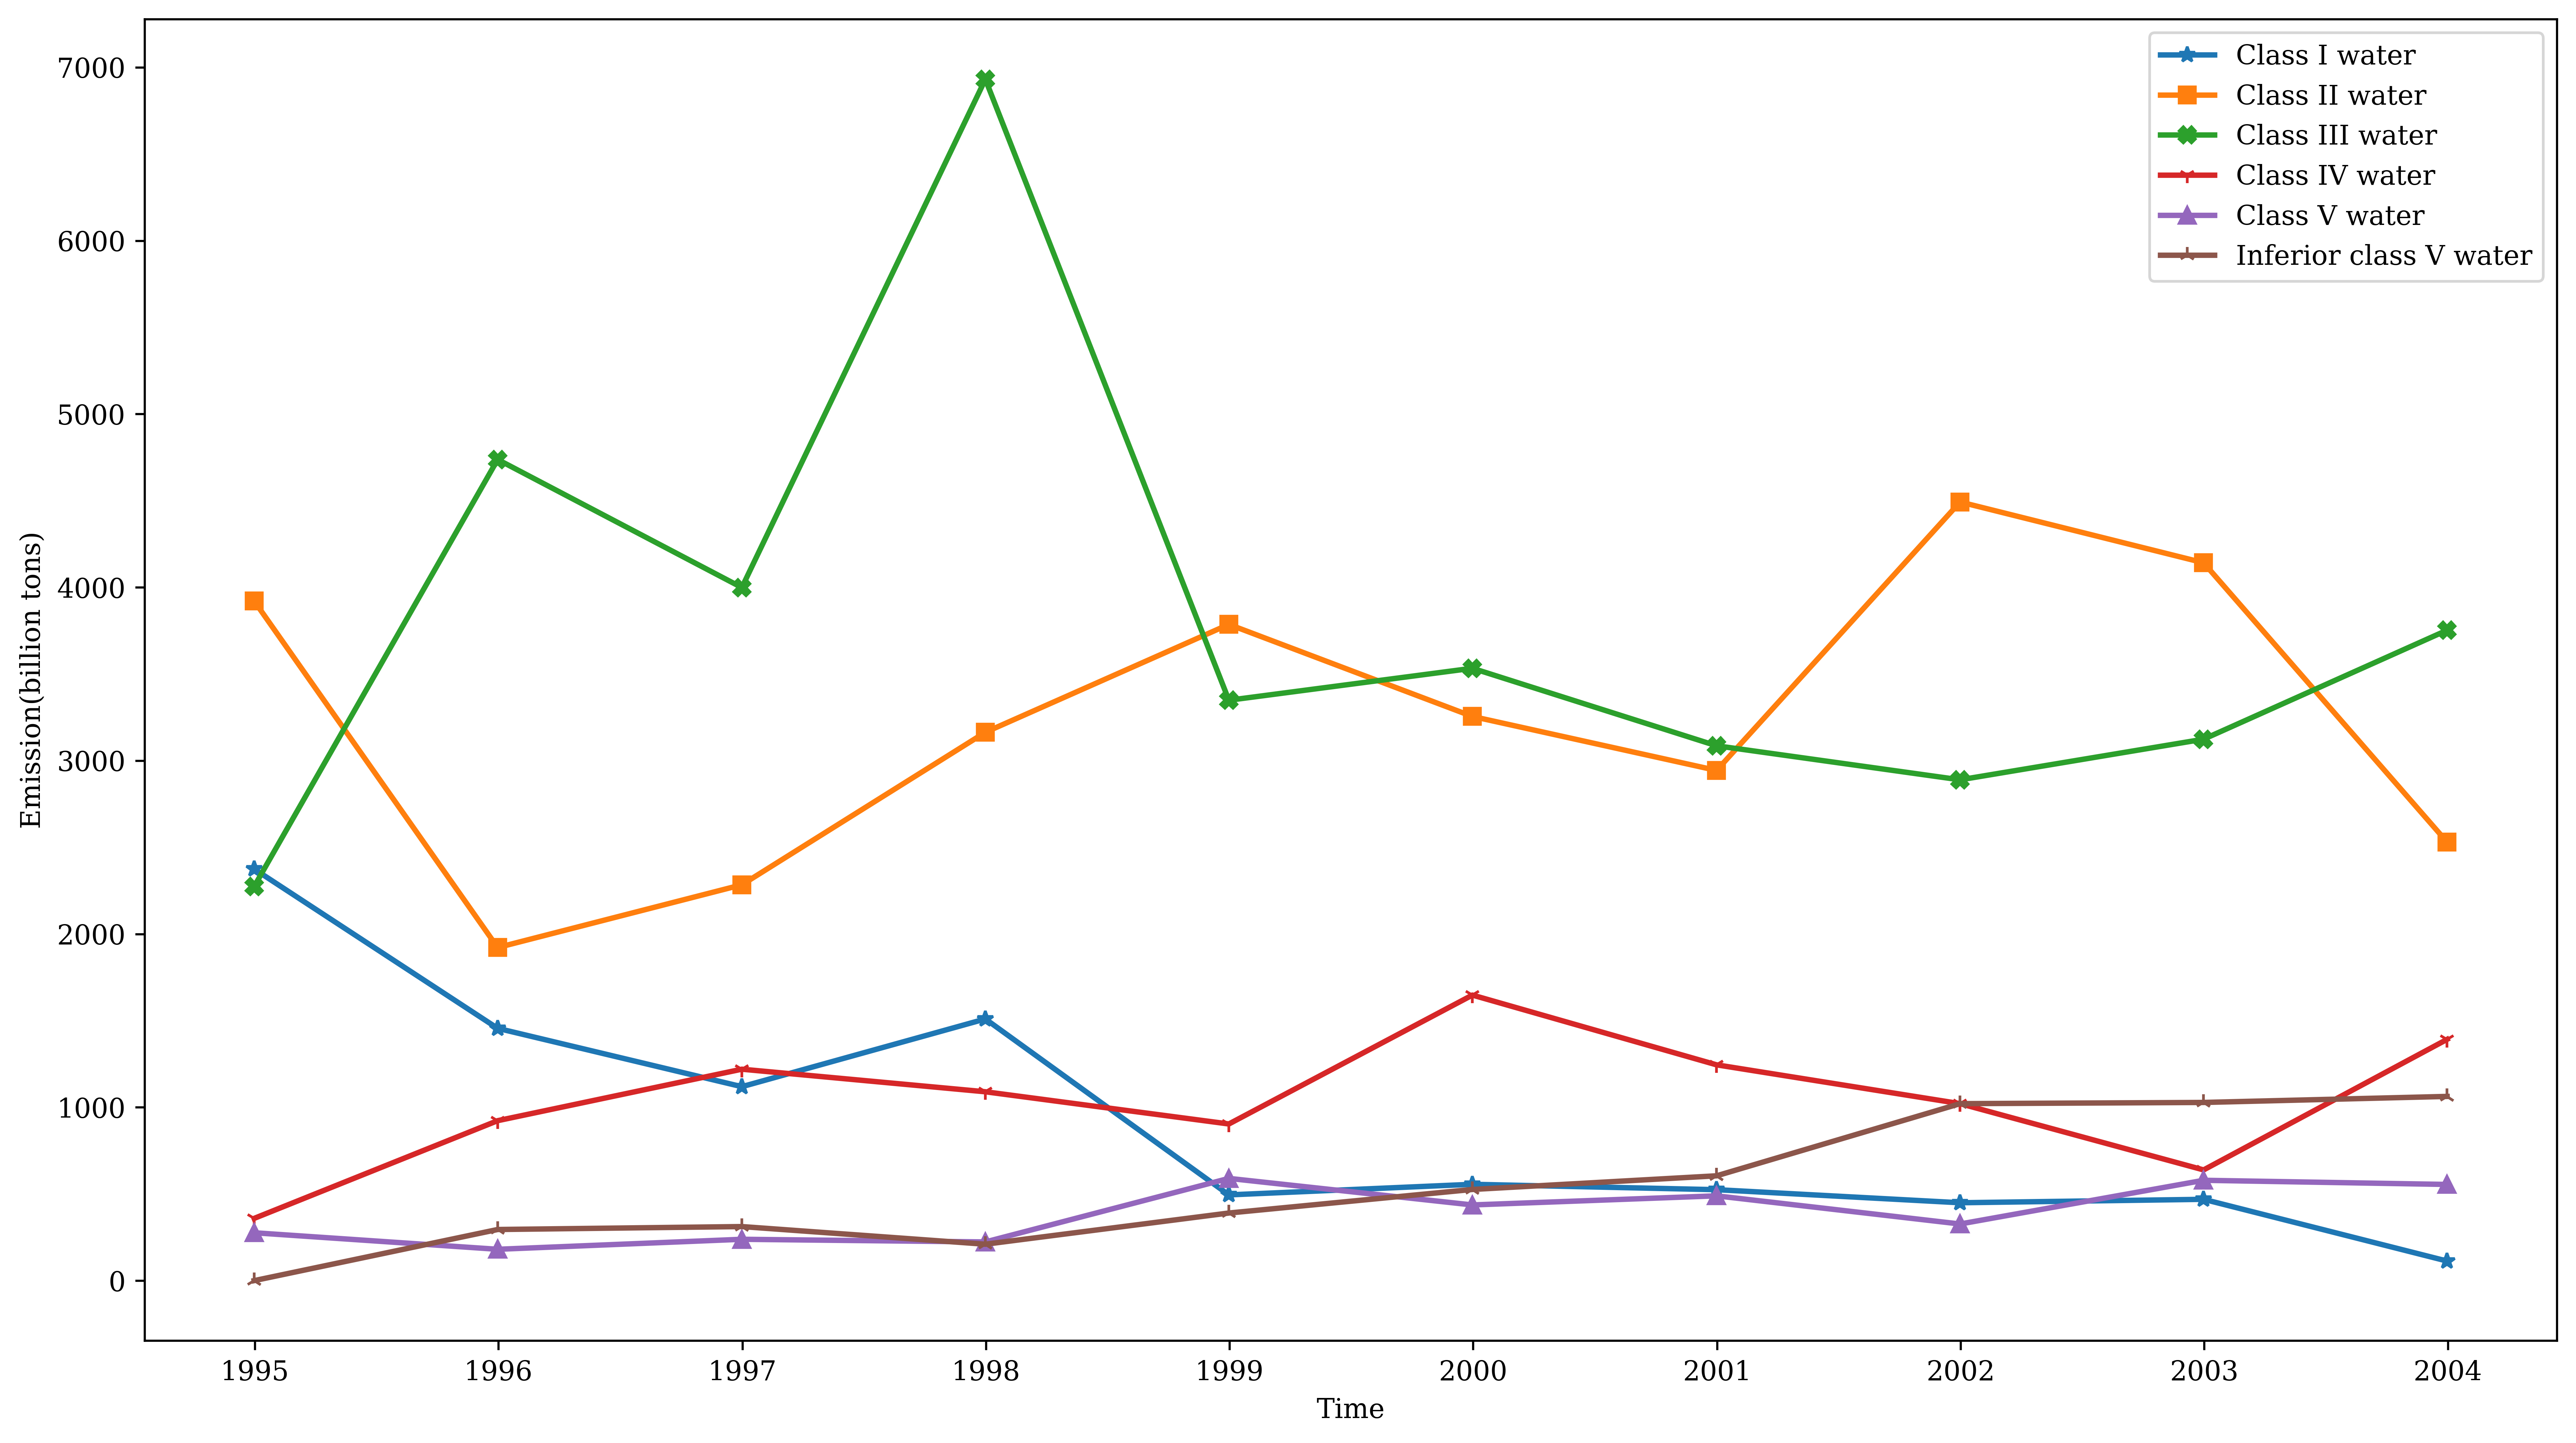

In [16]:
Total_flow=[9205,9513,9171.26,13127,9513,9924,8892.8,10210,9980,9405]
a_flow=[]
b_flow=[]
c_flow=[]
d_flow=[]
e_flow=[]
f_flow=[]
for i in range(10):
    a_flow.append(Total_flow[i]*df2['1_%'].values[i]*0.01)
    b_flow.append(Total_flow[i]*df2['2_%'].values[i]*0.01)
    c_flow.append(Total_flow[i]*df2['3_%'].values[i]*0.01)
    d_flow.append(Total_flow[i]*df2['4_%'].values[i]*0.01)
    e_flow.append(Total_flow[i]*df2['5_%'].values[i]*0.01)
    f_flow.append(Total_flow[i]*df2['6_%'].values[i]*0.01)
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(16,9),dpi=600)
plt.plot(pd.date_range('1994',freq='Y',periods=10),a_flow,marker='*',label='Class I water',lw=2)
plt.plot(pd.date_range('1994',freq='Y',periods=10),b_flow,marker='s',label='Class II water',lw=2)
plt.plot(pd.date_range('1994',freq='Y',periods=10),c_flow,marker='X',label='Class III water',lw=2)
plt.plot(pd.date_range('1994',freq='Y',periods=10),d_flow,marker='1',label='Class IV water',lw=2)
plt.plot(pd.date_range('1994',freq='Y',periods=10),e_flow,marker='^',label='Class V water',lw=2)
plt.plot(pd.date_range('1994',freq='Y',periods=10),f_flow,marker='2',label='Inferior class V water',lw=2)
plt.ylabel('Emission(billion tons)')
plt.xlabel('Time')
plt.xticks()
plt.legend()
plt.savefig(r'C:\Users\Bingbing\Desktop\各类废水.png')

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


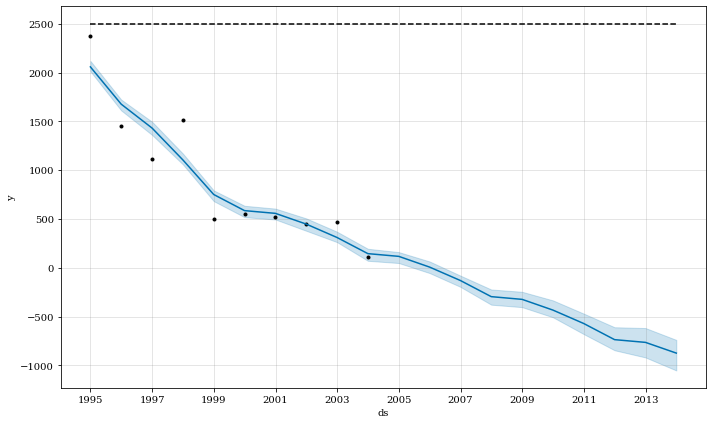

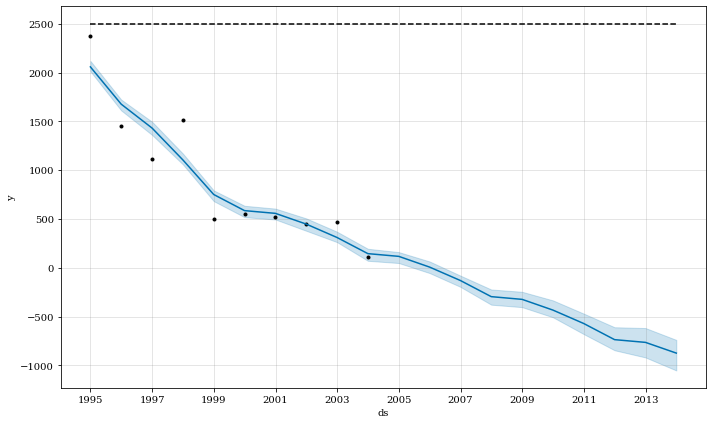

In [69]:
df3_1=pd.DataFrame({'ds':pd.date_range('1994',freq='Y',periods=10),'y':a_flow})
df3_2=pd.DataFrame({'ds':pd.date_range('1994',freq='Y',periods=10),'y':b_flow})
df3_3=pd.DataFrame({'ds':pd.date_range('1994',freq='Y',periods=10),'y':c_flow})
df3_4=pd.DataFrame({'ds':pd.date_range('1994',freq='Y',periods=10),'y':d_flow})
df3_5=pd.DataFrame({'ds':pd.date_range('1994',freq='Y',periods=10),'y':e_flow})
df3_6=pd.DataFrame({'ds':pd.date_range('1994',freq='Y',periods=10),'y':f_flow})
m=Prophet(changepoint_prior_scale=0.5,interval_width=0.2,changepoint_range=1,n_changepoints=8,growth='linear')
df3_1['cap']=2500
df3_1['floor']=0
m.fit(df3_1)
future=m.make_future_dataframe(periods=10,freq='Y')
future['cap']=2500
future['floor']=-100
f1=m.predict(future)
m.plot(f1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

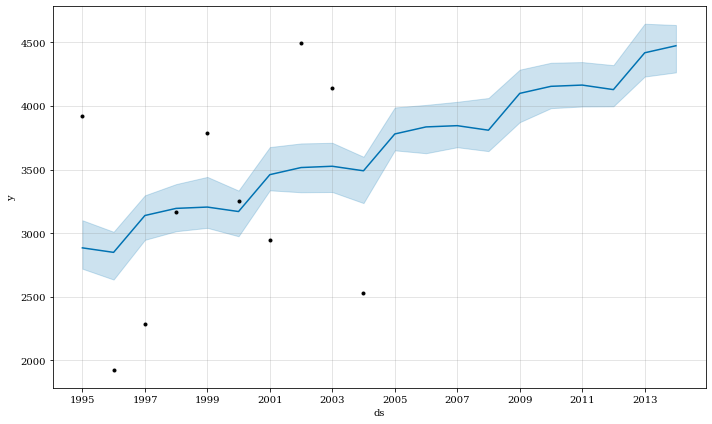

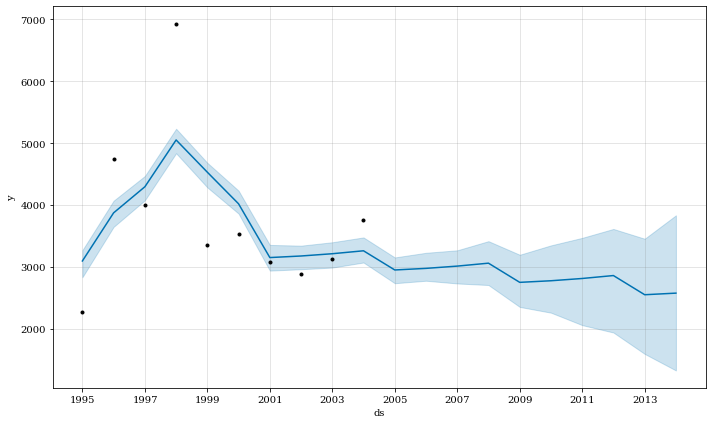

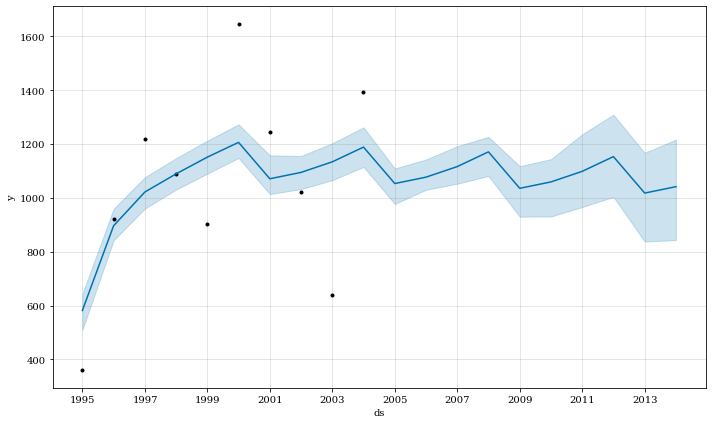

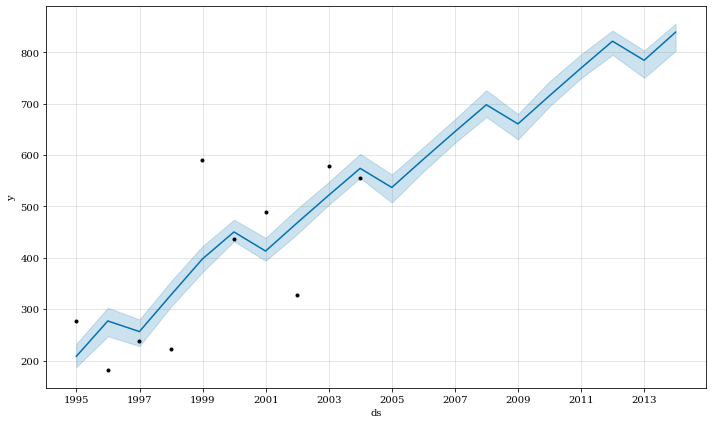

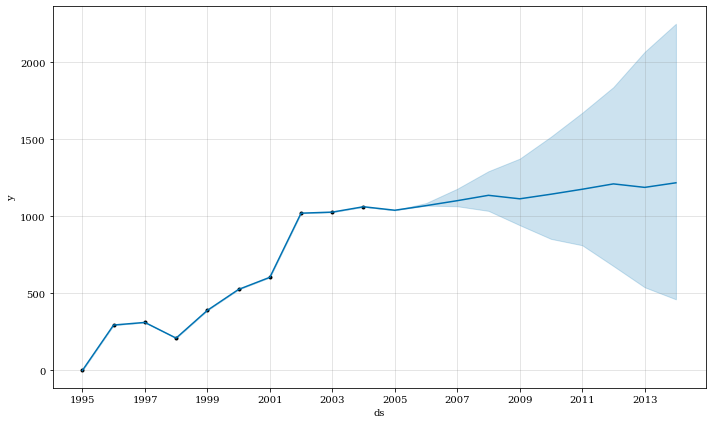

In [72]:
def model(df4):
    m=Prophet(changepoint_prior_scale=0.9,interval_width=0.2,changepoint_range=1,n_changepoints=8,growth='linear')
    m.fit(df4)
    future=m.make_future_dataframe(periods=10,freq='Y')
    forecast2=m.predict(future)
    m.plot(forecast2)
    return forecast2

f2=model(df3_2)
f3=model(df3_3)
f4=model(df3_4)
f5=model(df3_5)
f6=model(df3_6)

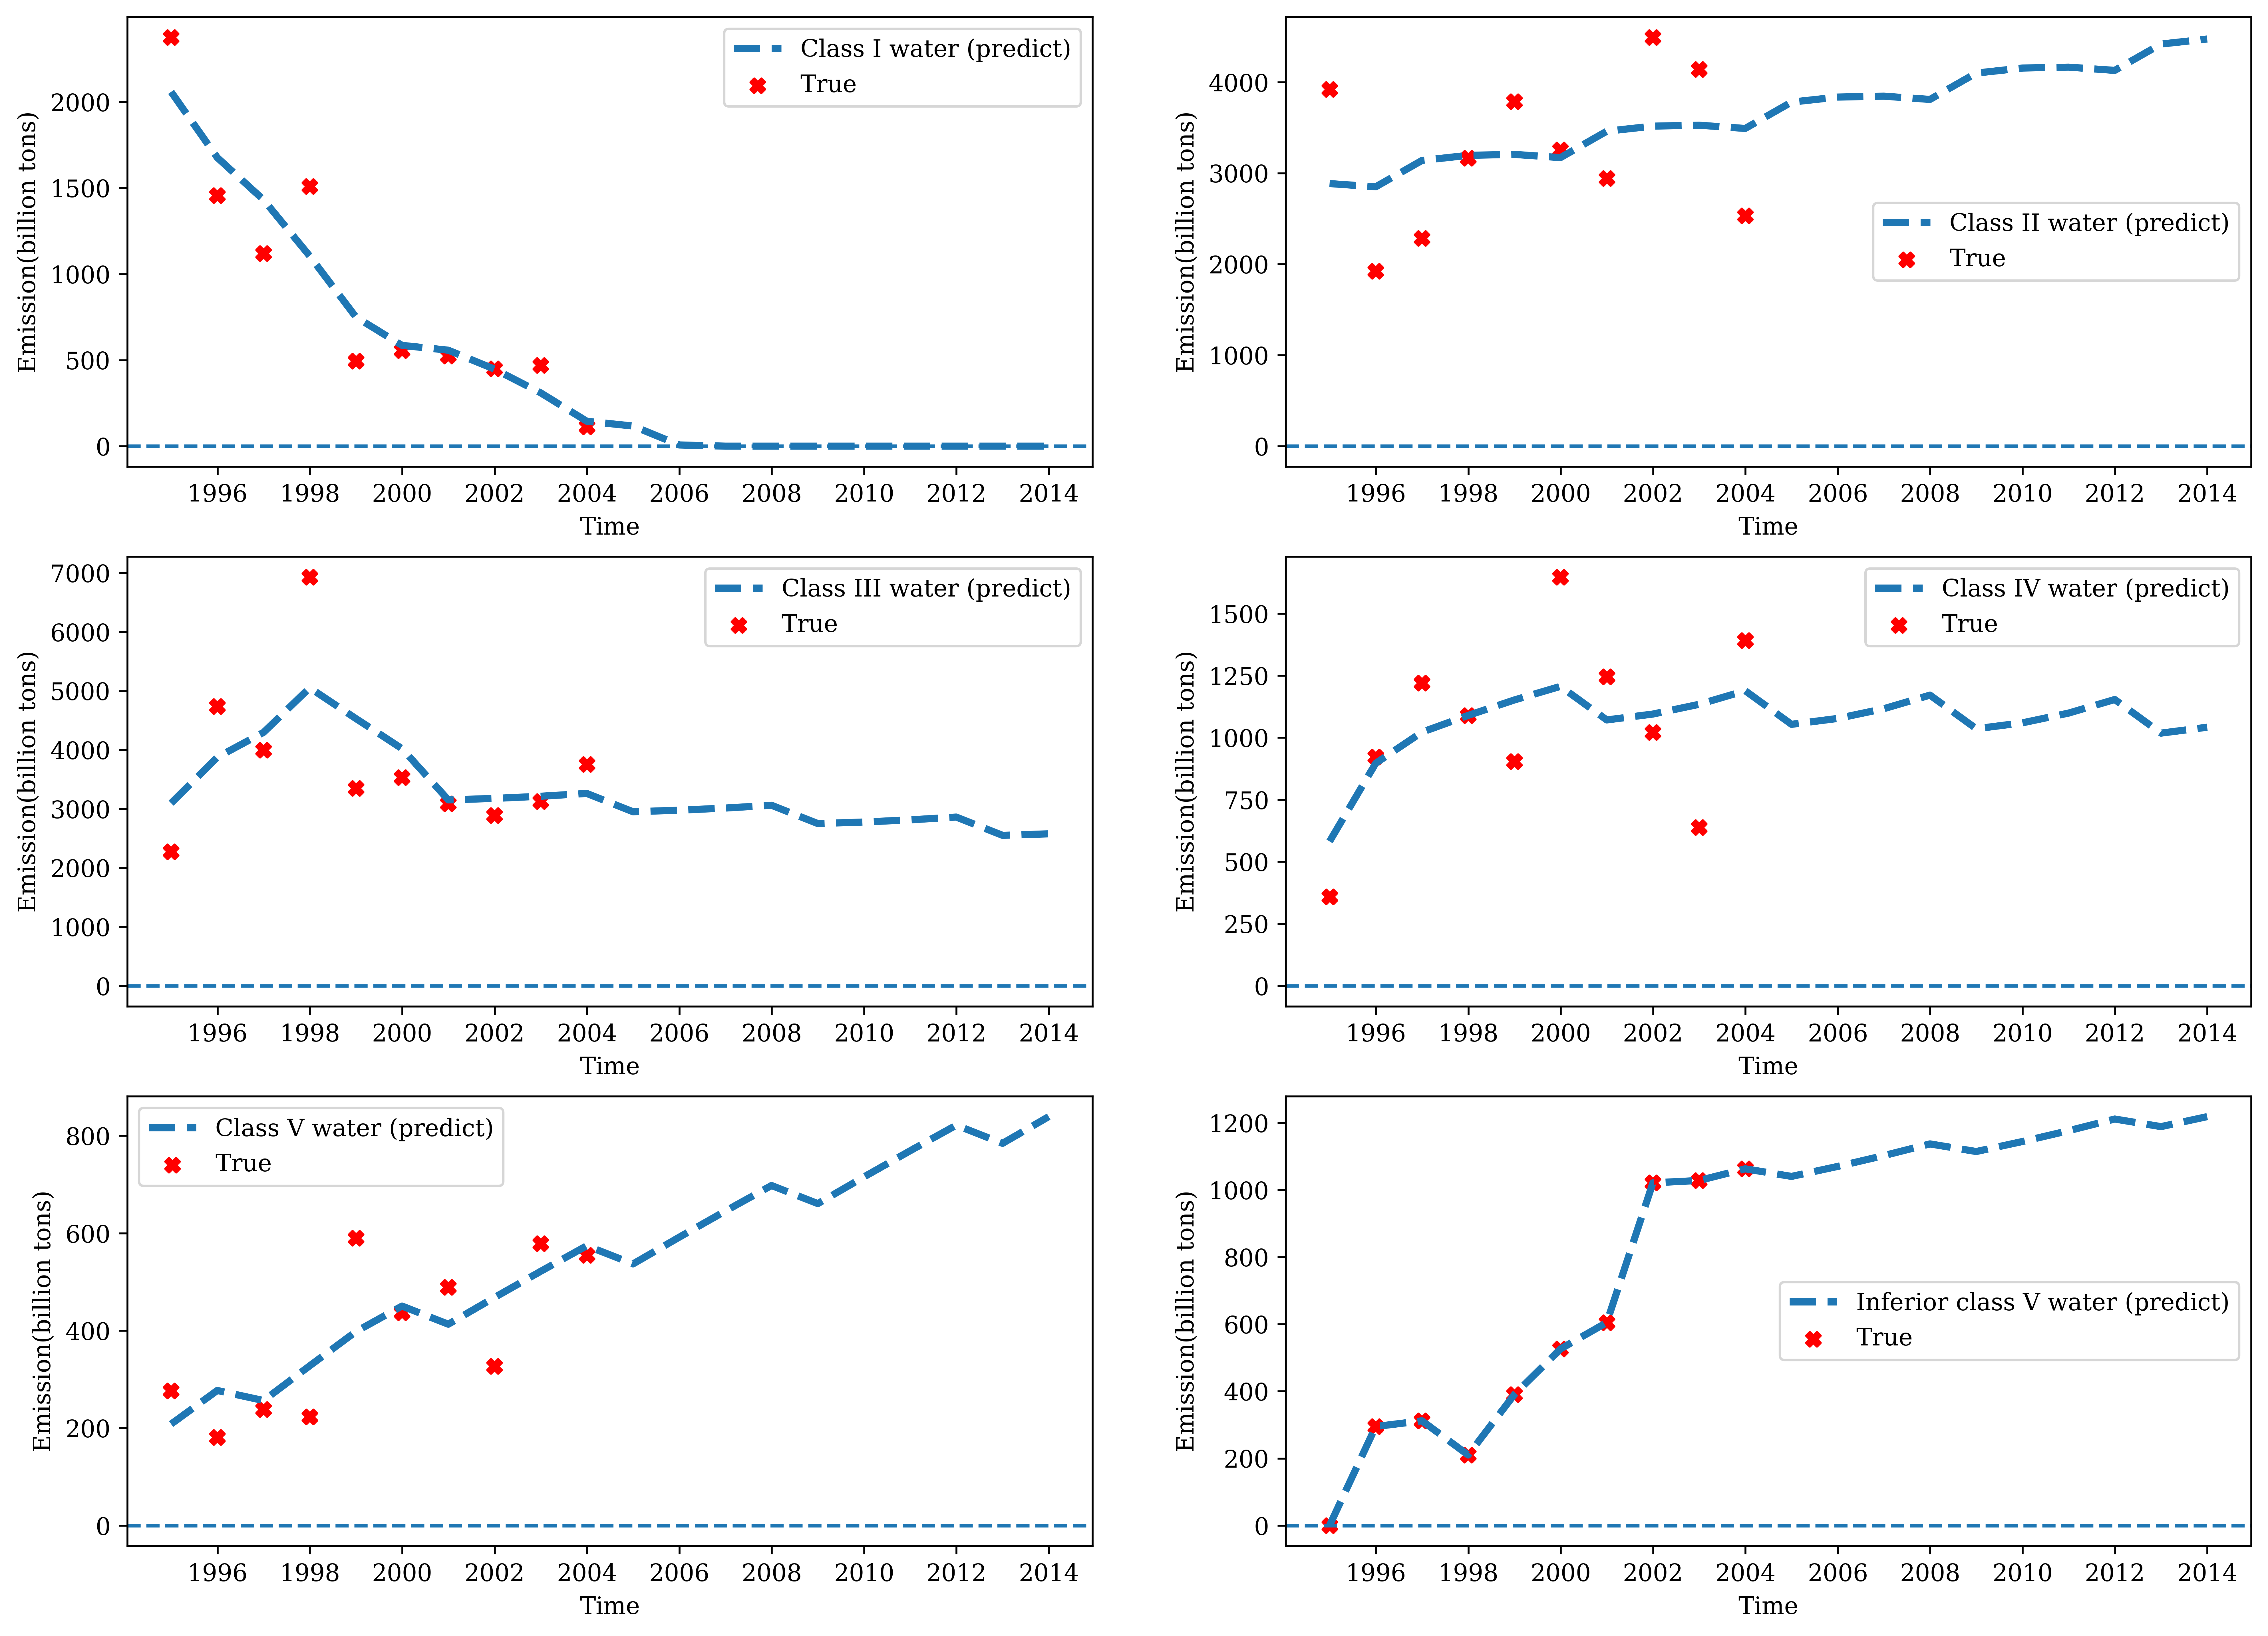

In [75]:
def plot_image(a_flow,forecast2,label):
    #fig, ax = plt.subplots(dpi=600,figsize=(16,9))
    #ax.fill_between(pd.date_range('1994',freq='Y',periods=20),forecast2['yhat_upper'], forecast2['yhat_lower'], alpha=.5,linewidth=0)
    plt.plot(pd.date_range('1994',freq='Y',periods=20),forecast2['yhat'],label=label,lw=3,ls='--')
    plt.scatter(pd.date_range('1994',freq='Y',periods=10),a_flow,marker='X',c='r',label='True')
    plt.axhline(y=0,ls='--')
    plt.ylabel('Emission(billion tons)')
    plt.xlabel('Time')
    plt.xticks()
    plt.legend()
plt.figure(figsize=(16,16),dpi=600)
ax1=plt.subplot(421)
plot_image(a_flow,f1,'Class I water (predict)')
ax2=plt.subplot(422)
plot_image(b_flow,f2,'Class II water (predict)')
ax3=plt.subplot(423)
plot_image(c_flow,f3,'Class III water (predict)')
ax4=plt.subplot(424)
plot_image(d_flow,f4,'Class IV water (predict)')
ax5=plt.subplot(425)
plot_image(e_flow,f5,'Class V water (predict)')
ax6=plt.subplot(426)
plot_image(f_flow,f6,'Inferior class V water (predict)')
plt.savefig(r'C:\Users\Bingbing\Desktop\各类预测.png')

In [74]:
list1=[]
for i in range(10,20):
    if(f1['yhat'][i]<0):
        f1['yhat'][i]=0
    sum=f1['yhat'][i]+f2['yhat'][i]+f3['yhat'][i]+f4['yhat'][i]+f5['yhat'][i]
    sum_2=f4['yhat'][i]+f5['yhat'][i]
    each=0
    print(sum_2/sum)
    if(sum_2/sum>0.2):
        sum_3=f1['yhat'][i]+f2['yhat'][i]+f3['yhat'][i]
        each=sum_2-sum_3/4
        print(i)
    each=each+f6['yhat'][i]
    list1.append(each)

0.18847726786300303
0.19662392072644294
0.20438065373107409
12
0.2138663791632518
13
0.19850360359831043
0.20388279906769646
15
0.21117429153995668
16
0.2203318088385631
17
0.20550545410281248
18
0.21062392070988775
19


In [76]:
list1

[1040.1123753565107,
 1069.8925223096494,
 1149.328579277061,
 1288.4364753852071,
 1114.2941146917194,
 1186.3312221745903,
 1299.8621414933696,
 1438.9700376010815,
 1248.8410449467651,
 1336.8647843916601]